In [1]:
!pip install qiskit[visualization]==0.46.0
!pip install qiskit-aer


In [2]:
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister,Aer,execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex

# Design a quantum(reversible) circuit for implementing OR gate.

In [11]:
# A xor B xor AB = A OR B

for input in ['00','01','10','11']:
    qc = QuantumCircuit(3,1)
    if input[-2]=='1':
        qc.x(0)
    elif input[-1]=='1':
        qc.x(1)
    
    qc.cx(0,2)
    qc.cx(1,2)
    qc.ccx(0,1,2)
    qc.measure(2,0)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    print('Input: ',input,'Output: ',counts)

Input:  00 Output:  {'0': 1000}
Input:  01 Output:  {'1': 1000}
Input:  10 Output:  {'1': 1000}
Input:  11 Output:  {'1': 1000}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8052\4189817958.py:12: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)


## Implement Fredkin gate using CNOT & CCNOT operators and generate the corresponding matrix using unitary_simulator

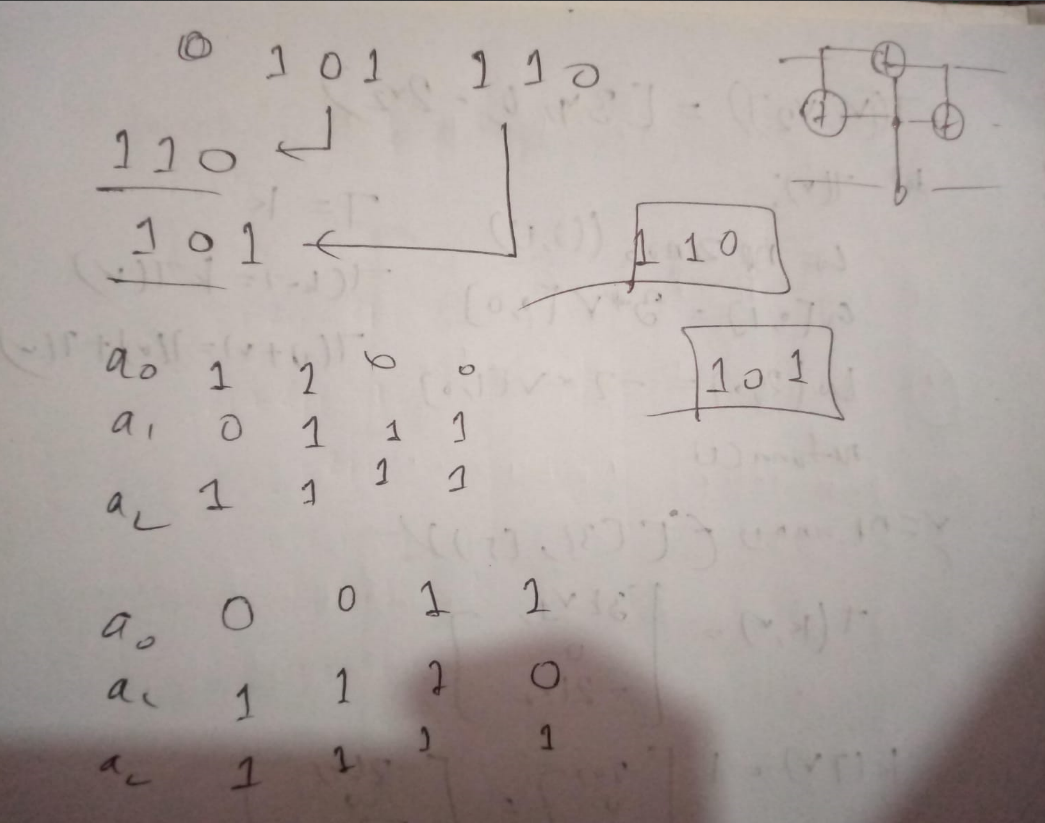

In [4]:
def fredkin():
    qc = QuantumCircuit(3)
    qc.cx(0,1)
    qc.ccx(2,1,0)
    qc.cx(0,1)
    return qc

In [6]:
circuit = fredkin()
job = execute(circuit,Aer.get_backend('unitary_simulator'),shots=1)
u = job.result().get_unitary(circuit,decimals=3).data
array_to_latex(u)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2796\111519054.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit,Aer.get_backend('unitary_simulator'),shots=1)


<IPython.core.display.Latex object>

In [8]:
# And gate using reversible computing

qc =  QuantumCircuit(3,1) # 3 q-reg for x1,x2,y and one classical reg to read the output of and operation

combinations = ['00', '01','10','11']

for i in combinations:
    
    if i[-2]=='1':
        
        qc.x(1)
    
    if i[-1]=='1':
        
        qc.x(0)
    
    qc.ccx(0,1,2)
    
    print(f'For {i} And gate will give : ')
    
    qc.measure(2,0)
    
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    
    counts = job.result().get_counts(qc)
    
    print(counts)
    
    qc.data =[]
    


For 00 And gate will give : 
{'0': 1000}
For 01 And gate will give : 
{'0': 1000}
For 10 And gate will give : 
{'0': 1000}
For 11 And gate will give : 
{'1': 1000}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8052\3129924975.py:23: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)


In [16]:
# Xor operation
qc = QuantumCircuit(3,1)
for i in ['00','01','10','11']:
    if i[-2]=='1':
        qc.x(1)
    if i[-1]=='1':
        qc.x(0)
    qc.x(2)
    qc.ccx(0,2,1)
    qc.measure(1,0)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    print('Input: ',i,'Output: ',counts)
    qc.data = []

Input:  00 Output:  {'0': 1000}
Input:  01 Output:  {'1': 1000}
Input:  10 Output:  {'1': 1000}
Input:  11 Output:  {'0': 1000}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8052\478248198.py:11: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
